# Lista de exercícios 1
## EX-1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Parâmetros do problema:
d = 5                             # dimensão do espaço de vetores de entrada
x = np.random.random(d) - 0.5     # vetor de entrada
w = np.random.random(d)           # vetor de pesos
b = np.random.random(1) - 0.5     # escalar de bias

def neuronEval(x, w, b=None):
    """
    Funcao que avalia a resposta de um neuronio.
    """
    if (b is not None):
        x = np.append(x, 1)
        w = np.append(w, b)
    y = np.sign(np.dot(x,w))
    if y == 0:
        y = -1
    return y

print 'Vetor de entrada:', x
print 'Vetor de pesos:', w
print 'Escalar bias:', b
print '\nResultado do neuronio:', neuronEval(x, w, b)


Vetor de entrada: [-0.03805853  0.33513488 -0.08856999 -0.14580882  0.08449715]
Vetor de pesos: [ 0.23839587  0.55437672  0.17352145  0.45759731  0.58487459]
Escalar bias: [-0.43596756]

Resultado do neuronio: -1.0


## EX-2

In [3]:
def plotSepPlane(df, w, x_i=None, no_plot=False, ax=None, writer=None):
    if (ax is None):
        fig, ax = plt.subplots(figsize=(5,5))
        ax = plt.subplot()
    else:
        ax.clear()
    ax = df.plot(ax=ax, kind='scatter', x='x1', y='x2',
                 c=df_train.y.map(lambda x: 'blue' if (x > 0) else 'red'),
                 s=50, marker='o',
                 #marker=df_train.y.map(lambda x: '+' if (x > 0) else '-')
                )
    if 'right_answer' in df.columns:
        df.plot(ax=ax, kind='scatter', x='x1', y='x2', c='none', s=100,
                marker='o',
                edgecolors=df.right_answer.map(lambda x: 'blue' if (x > 0) else 'red'))
    if not (x_i is None):
        plt.scatter(x_i[0], x_i[1], marker='o', s=350, c='none', edgecolors='green')
    if not (w is None):
        x1 = np.linspace(df.x1.min(), df.x1.max(), 2)
        if (w[1] == 0) and (w[0] != 0):
            x2 = np.linspace(df.x2.min(), df.x2.max(), 2)
            x1 = np.ones(2) * -w[2]/w[0]
        elif (w[0] == 0) and (w[1] != 0):
            x2 = np.ones(2) * -w[2]/w[1]
        elif (w[0] == 0) and (w[1] == 0):
            x1 = [0]
            x2 = [0]
        else:
            x2 = (-w[0]*x1 - w[2])/w[1]
        ax.plot(x1, x2, 'r')
    
    if no_plot:
        return ax
    elif not (writer is None):
        ax.set_xlim(-3,7)
        ax.set_ylim(-3,7)
        writer.grab_frame()
    else:
        plt.show()


,x1,x2,y
0,3.016543,0.460403,1.0
1,0.832180,1.781136,1.0
2,1.262835,0.879967,1.0
3,0.880900,0.899895,1.0
4,1.262107,2.711613,1.0
5,0.216283,2.384872,1.0
6,1.661560,2.497308,1.0
7,0.976023,2.339285,1.0
8,0.965214,1.307914,1.0
9,1.921138,0.977337,1.0


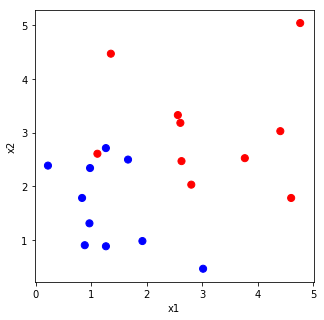

C:\Users\Lenovo\Miniconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Vetor de pesos: [-0.15894783 -0.31610619  1.025     ]


,x1,x2,y,b,y_hat,right_answer
0,3.016543,0.460403,1.0,1,1.0,1.0
1,0.832180,1.781136,1.0,1,1.0,1.0
2,1.262835,0.879967,1.0,1,1.0,1.0
3,0.880900,0.899895,1.0,1,1.0,1.0
4,1.262107,2.711613,1.0,1,-1.0,-1.0
5,0.216283,2.384872,1.0,1,1.0,1.0
6,1.661560,2.497308,1.0,1,-1.0,-1.0
7,0.976023,2.339285,1.0,1,1.0,1.0
8,0.965214,1.307914,1.0,1,1.0,1.0
9,1.921138,0.977337,1.0,1,1.0,1.0


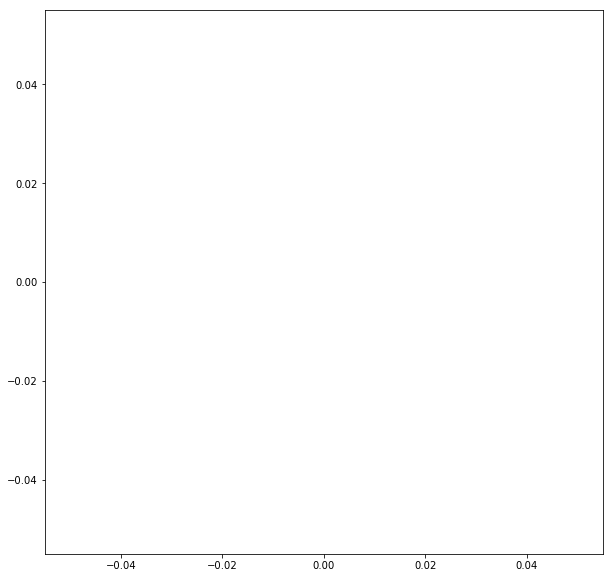

In [4]:
for jj in range(1):
    ## Conjunto de treinamento

    train_case = 'w'
    n_samples  = 10

    if train_case == 'AND':
        # Conjunto para o caso AND
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,-1,-1,-1]})
        print 'Caso "AND"'
        display(df_train)

    elif train_case == 'XOR':
        # Conjunto para o caso AND
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [-1,1,1,-1]})
        print 'Caso "AND"'
        display(df_train)

    elif train_case == 'XOR':
        # Conjunto para o caso OR
        df_train = pd.DataFrame({'x1': [1,1,0,0], 'x2': [1,0,1,0], 'y': [1,1,1,-1]})
        print 'Caso "OR"'
        display(df_train)

    else:
        mu1 = 1
        mu2 = 1
        sigma1 = 1
        sigma2 = 1
        x1 = sigma1*np.random.randn(n_samples) + mu1
        x2 = sigma2*np.random.randn(n_samples) + mu2
        df_train = pd.DataFrame({'x1': x1, 'x2': x2})
        df_train['y'] = 1

        mu1 = 3
        mu2 = 3
        sigma1 = 1
        sigma2 = 1
        x1 = sigma1*np.random.randn(n_samples) + mu1
        x2 = sigma2*np.random.randn(n_samples) + mu2
        df_train = df_train.append(pd.DataFrame({'x1': x1, 'x2': x2}), ignore_index=True)
        df_train.ix[df_train.y.isnull(), 'y'] = -1


    # Funcao que treina o perceptron
    max_epoch = 2
    d = 2

    import pdb
    def evalPerceptron(df, w, b=None):
        #pdb.set_trace()
        """
        Funcao que avalia a resposta de um neuronio para varias entradas.
        """
        if (b is not None) and ('b' not in df.columns):
            df['b'] = 1
            w = np.append(w, b)
        y = np.sign(np.inner(df.drop('y', axis=1), w))
        df['y_hat'] = y
        df['right_answer'] = df.y_hat*df.y
        return df

    def trainPerceptron(df, max_epoch=1000, d='infer', learning_rate=0.2,
                        w_init=None, b_init=None, debug=False, writer=None, ax=None):
        """
        Funcao que treina um perceptron, realizando no maximo (max_epoch) ciclos.
        """
        if d == 'infer':
            d = df.shape[1] - 1
        if (w_init is None):
            w_init = np.zeros(d)
        if (b_init is None):
            b_init = np.array([1])

        w_i = np.append(w_init, b_init)
        d = d + 1
        df['b'] = 1

        for i_epoch in range(max_epoch):
            if debug: print '\n------------\nRodada #%s' % i_epoch
            for ni, x_i in df.sample(df.shape[0]).iterrows():
                y_i = x_i.pop('y')
                x_i = x_i.values
                y_hat = neuronEval(x_i, w_i)
                if debug:
                    print '\n> x_i:', x_i
                    print '> w_i:', w_i
                    print '> y_i:', y_i
                    print '> y_hat:', y_hat
                    df1 = evalPerceptron(df.copy(), w_i, b=None)
                    plotSepPlane(df1, w_i, x_i=x_i, ax=ax, writer=writer)     
                if y_i*y_hat < 0:
                    w_i = w_i + learning_rate*y_i*x_i
                    if debug:
                        print '**********Atualizando pesos:\n> w_i:', w_i
                        df1 = evalPerceptron(df.copy(), w_i, b=None)
                        plotSepPlane(df1, w_i, x_i=x_i, ax=ax, writer=writer)     

        print 'Vetor de pesos:', w_i
        return w_i

    display(df_train)
    plotSepPlane(df_train, None)

    import matplotlib
    matplotlib.use("Agg")
    import matplotlib.animation as manimation

    FFMpegWriter = manimation.writers['ffmpeg']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                    comment='Movie support!')
    writer = FFMpegWriter(fps=5, metadata=metadata)


    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot([], [], 'k-o')

    with writer.saving(fig, "%s_training_test.mp4" % jj, 100):
        w = trainPerceptron(df_train, max_epoch=50, w_init=(np.random.random(2) - 0.5),
                            learning_rate=0.005, d='infer', debug=False, writer=writer, ax=ax)
        y = evalPerceptron(df_train, w)
        display(y)

## Exercício 3

### a)

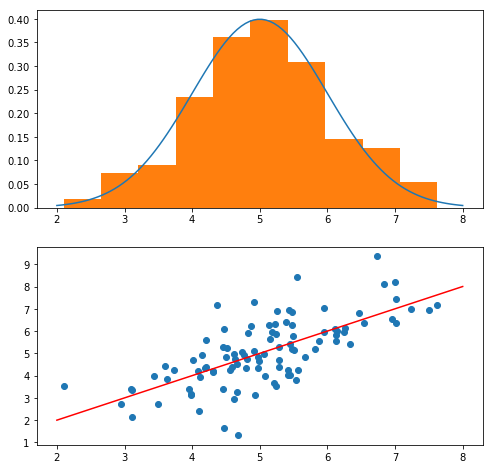

In [5]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 5
sigma = 1
n_sample = 100

# distribuição normal com esses parâmetros
x_normal = np.linspace(mu-3*sigma, mu+3*sigma, 100)
normal_curve = stats.norm.pdf(x_normal, loc=mu, scale=sigma)
ax1.plot(x_normal, normal_curve, '-')

# distribuição da amostra
x = mu + sigma*np.random.randn(n_sample)
ax1.hist(x, normed=True)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

y = x + sigma*np.random.randn(n_sample)
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, x_normal, 'r-')
plt.show()

### b)

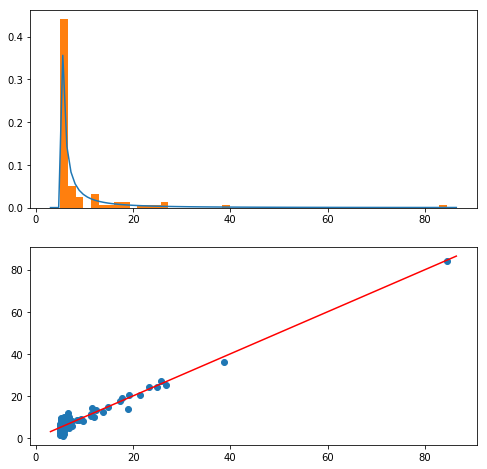

In [81]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 5
sigma = 2
n_sample = 100

# distribuição da amostra
x = sigma*np.random.randn(n_sample)
x = mu + np.exp(x)
#x = np.random.lognormal(size=n_sample, mean=5, sigma=2)

# distribuição normal com esses parâmetros
x_normal = np.linspace(x.min() - sigma, x.max() + sigma, 100)
normal_curve = stats.lognorm.pdf(x_normal, sigma, loc=mu)

ax1.plot(x_normal, normal_curve, '-')
ax1.hist(x, normed=True, bins=(x.shape[0])/2)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

y = x + sigma*np.random.randn(n_sample)
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, x_normal, 'r-')
plt.show()

### c)

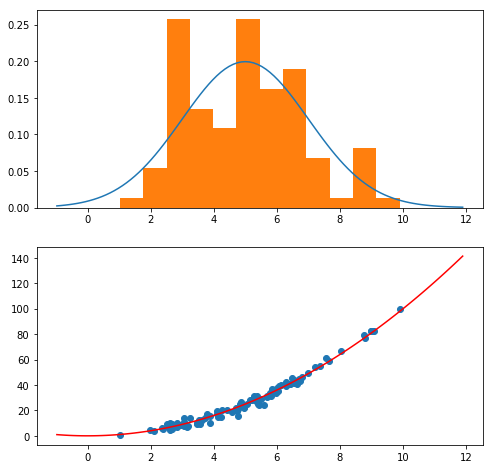

In [89]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 5
sigma = 2
n_sample = 100

# distribuição da amostra
x = mu + sigma*np.random.randn(n_sample)

# distribuição normal com esses parâmetros
x_normal = np.linspace(x.min() - sigma, x.max() + sigma, 100)
normal_curve = stats.norm.pdf(x_normal, loc=mu, scale=sigma)

ax1.plot(x_normal, normal_curve, '-')
ax1.hist(x, normed=True, bins=(x.shape[0])/8)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

y = np.square(x) + sigma*np.random.randn(n_sample)
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, np.square(x_normal), 'r-')
plt.show()

### d)

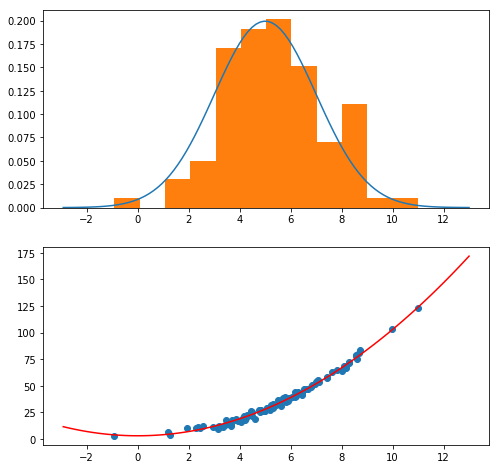

In [90]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 5
sigma = 2
n_sample = 100

# distribuição da amostra
x = mu + sigma*np.random.randn(n_sample)

# distribuição normal com esses parâmetros
x_normal = np.linspace(x.min() - sigma, x.max() + sigma, 100)
normal_curve = stats.norm.pdf(x_normal, loc=mu, scale=sigma)

ax1.plot(x_normal, normal_curve, '-')
ax1.hist(x, normed=True, bins=(x.shape[0])/8)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

y = np.square(x) + 3 + sigma*np.random.randn(n_sample)
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, np.square(x_normal) + 3, 'r-')
plt.show()

### e)

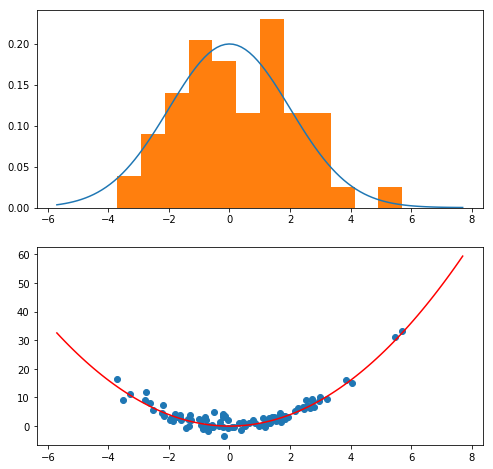

In [113]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 0
sigma = 2
n_sample = 100

# distribuição da amostra
x = mu + sigma*np.random.randn(n_sample)

# distribuição normal com esses parâmetros
x_normal = np.linspace(x.min() - sigma, x.max() + sigma, 100)
normal_curve = stats.norm.pdf(x_normal, loc=mu, scale=sigma)

ax1.plot(x_normal, normal_curve, '-')
ax1.hist(x, normed=True, bins=(x.shape[0])/8)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

x = np.sort(x)
y = np.where(x > 0, np.square(x) + 1*np.random.randn(n_sample),
                    np.square(x) + 2*np.random.randn(n_sample))
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, np.square(x_normal), 'r-')
plt.show()

### f)

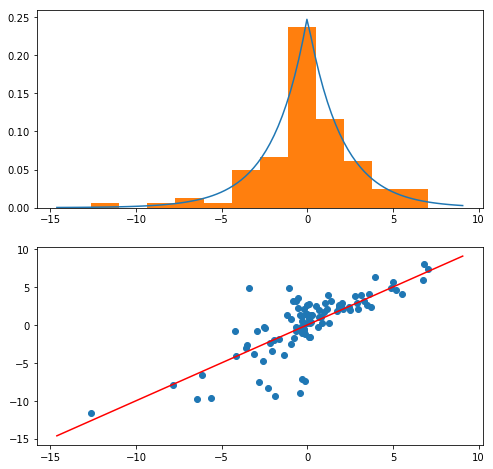

In [133]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)

# parâmetros da distribuição
mu = 0
sigma = 2
n_sample = 100

# distribuição da amostra
x = mu + sigma*np.random.randn(n_sample)
x = np.random.laplace(mu, sigma, n_sample)

# distribuição normal com esses parâmetros
x_normal = np.linspace(x.min() - sigma, x.max() + sigma, 100)
normal_curve = stats.norm.pdf(x_normal, loc=mu, scale=sigma)
normal_curve = stats.laplace.pdf(x_normal, loc=mu, scale=sigma)

ax1.plot(x_normal, normal_curve, '-')
ax1.hist(x, normed=True, bins=(x.shape[0])/8)

ax2 = fig.add_subplot(2, 1, 2) #plt.show()

x = np.sort(x)
y = np.where(x > 0, x + 1*np.random.randn(n_sample),
                    x + np.random.laplace(mu, 2, n_sample))
ax2.scatter(x, y, marker='o')
ax2.plot(x_normal, x_normal, 'r-')
plt.show()